In [1]:
import numpy as np

In [2]:
a = np.array([1, 2, 3, 4])

In [3]:
a[0], a[1]

(np.int64(1), np.int64(2))

In [5]:

B = np.array([
    [
        [1, 2, 3],
        [3, 4, 5],
    ],
    [
        [6, 7, 8],
        [9, 10, 11]
    ]
])
B

array([[[ 1,  2,  3],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [6]:
B.shape

(2, 2, 3)

In [7]:
B.size

12

In [8]:
a = np.array([1, 2, 3, 4])

In [9]:
a.sum()

np.int64(10)

In [10]:
a.mean()

np.float64(2.5)

In [11]:
a.std()

np.float64(1.118033988749895)

In [12]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd

In [13]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


(28, 28)


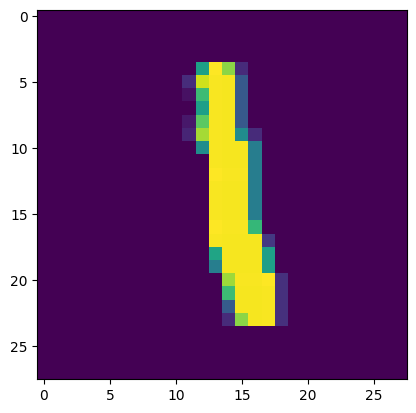

In [15]:
plt.imshow(X_train[6])
print(X_train[6].shape)

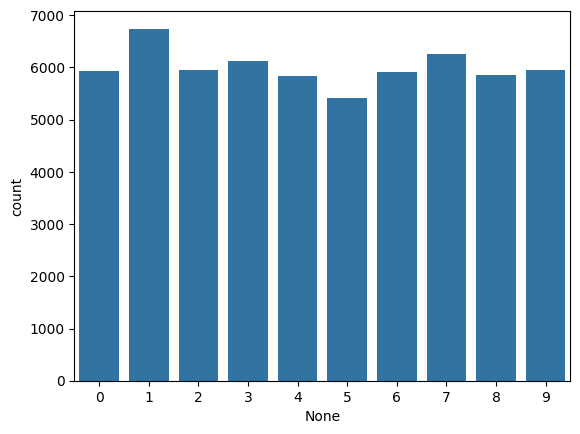

In [16]:
sns.countplot(x=pd.Series(y_train))
plt.show()

In [17]:
X_train[0][25]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [18]:
X_train = X_train / 255
X_test = X_test / 255

In [20]:
X_train[0][6]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.11764706, 0.14117647,
       0.36862745, 0.60392157, 0.66666667, 0.99215686, 0.99215686,
       0.99215686, 0.99215686, 0.99215686, 0.88235294, 0.6745098 ,
       0.99215686, 0.94901961, 0.76470588, 0.25098039, 0.        ,
       0.        , 0.        , 0.        ])

In [21]:
X_train.shape

(60000, 28, 28)

In [22]:
X_train[0].shape

(28, 28)

In [23]:
X_train_matrix=X_train.reshape(-1,28*28)

In [24]:
print(X_train_matrix.shape)
X_test_matrix=X_test.reshape(-1,28*28)
print(X_test_matrix[0])

(60000, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.       

In [25]:
model=keras.Sequential([
    keras.layers.Dense(128,input_shape=(784,),activation='relu'),
    keras.layers.Dense(128,input_shape=(128,),activation='relu'),
    keras.layers.Dense(10,input_shape=(128,),activation='softmax'),
])
print(model.summary())

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

None


In [26]:
model.input_shape

(None, 784)

In [27]:
history=model.fit(X_train_matrix,y_train,epochs=3,batch_size=32)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8813 - loss: 0.4061
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9685 - loss: 0.0980
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9796 - loss: 0.0644


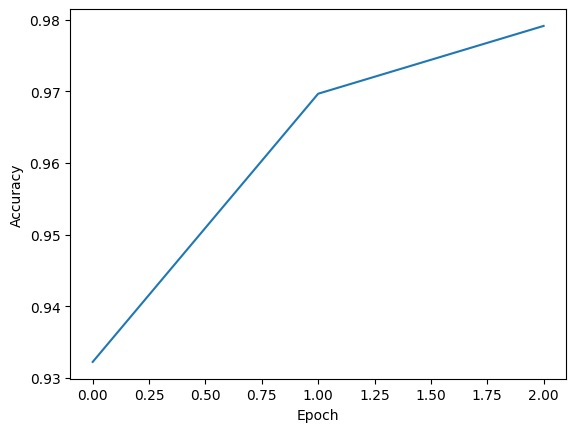

In [28]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.legend()
plt.show()

In [29]:
model.evaluate(X_test_matrix,y_test)
y_pred=model.predict(X_test_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9704 - loss: 0.0950
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [30]:
print(y_test)

[7 2 1 ... 4 5 6]


In [31]:
print(y_pred[0])

[4.5497083e-07 3.6662029e-06 2.2348740e-05 4.1513205e-05 8.6948056e-08
 1.2063780e-06 2.3551721e-11 9.9988419e-01 2.2927311e-06 4.4245695e-05]


In [32]:
y_pred = np.argmax(y_pred, axis=1)

In [33]:
print(y_pred)

[7 2 1 ... 4 5 6]


<Axes: >

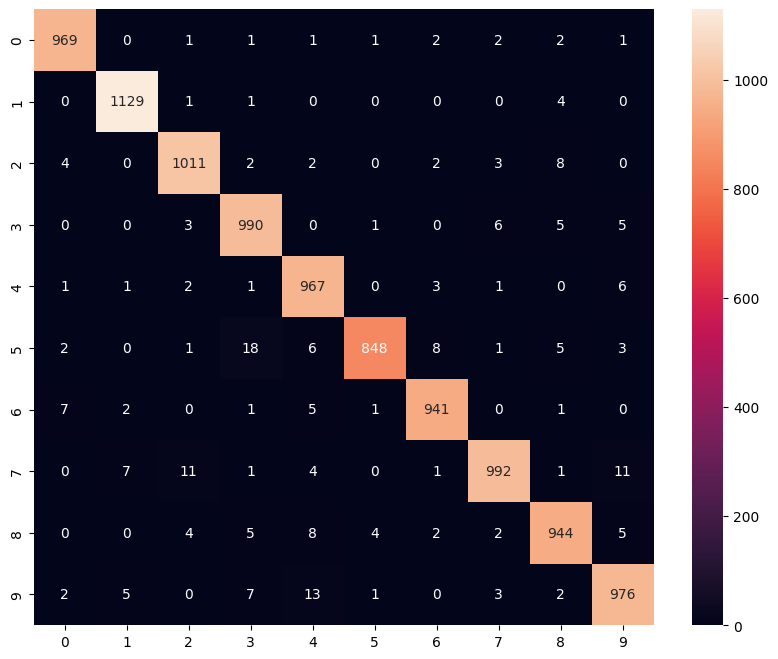

In [34]:
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

In [36]:
from PIL import Image as PILImage
img = PILImage.open('IMG.PNG')
print(f"Image format: {img.format}")
print(f"Image size: {img.size}")

Image format: JPEG
Image size: (1402, 989)


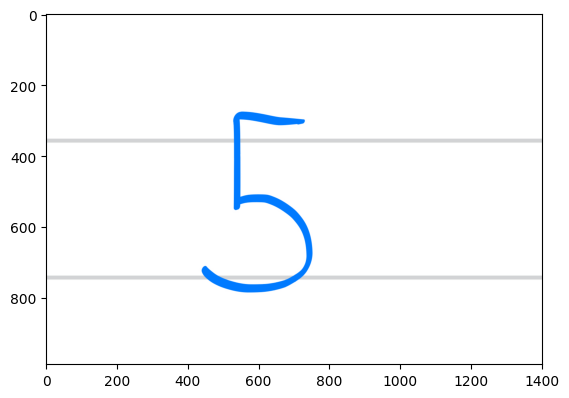

In [37]:
plt.imshow(img)

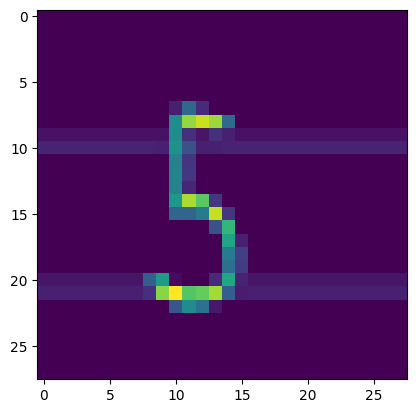

In [38]:
img1 = img.convert('L').resize((28, 28))
plt.imshow(img1)
img2=255-np.array(img1)
plt.imshow(img2)
img_array = img2 / 255.0
img_array = img_array.reshape(1, 28*28)

In [39]:
print(np.argmax(model.predict(img_array), axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[5]
